 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [4]:
# Reading whale returns
whale_returns = pd.read_csv('./resources/whale_returns.csv', parse_dates=True, index_col="Date", infer_datetime_format=True)
whale_returns.sort_index()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [5]:
# Count nulls
whale_returns.isnull().count()

SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [6]:
# Drop nulls
whale_returns = whale_returns.dropna().copy(deep=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_returns = pd.read_csv('./resources/algo_returns.csv', parse_dates=True, index_col="Date", infer_datetime_format=True)
algo_returns.sort_index()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [8]:
# Count nulls
algo_returns.isnull().count()

Algo 1    1241
Algo 2    1241
dtype: int64

In [9]:
# Drop nulls
algo_returns.dropna(inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history = pd.read_csv('./resources/sp_tsx_history.csv', parse_dates=True, index_col="Date", infer_datetime_format=True)
sp_tsx_history.sort_index()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [11]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace(r"[$,]", "", regex=True)
sp_tsx_history["Close"] = sp_tsx_history["Close"].astype("float")

In [13]:
# Calculate Daily Returns
sp_tsx_returns = (sp_tsx_history - sp_tsx_history.shift(1)) / sp_tsx_history.shift(1)
sp_tsx_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [14]:
# Drop nulls
sp_tsx_returns = sp_tsx_returns.dropna().copy(deep=True)

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns = sp_tsx_returns.rename(columns={"Close": "S&P TSX"})

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_returns, algo_returns, sp_tsx_returns], axis="columns", join="inner")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

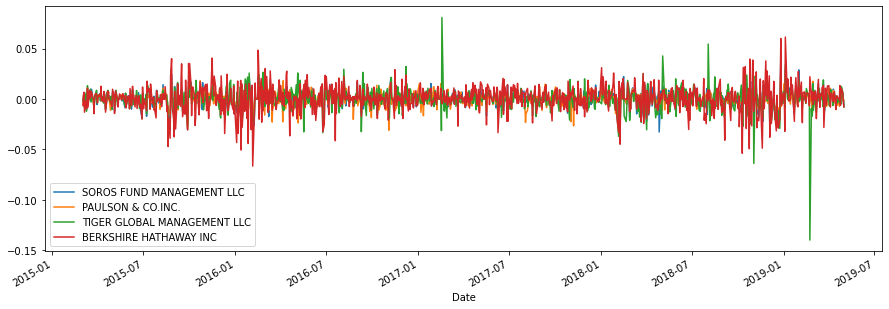

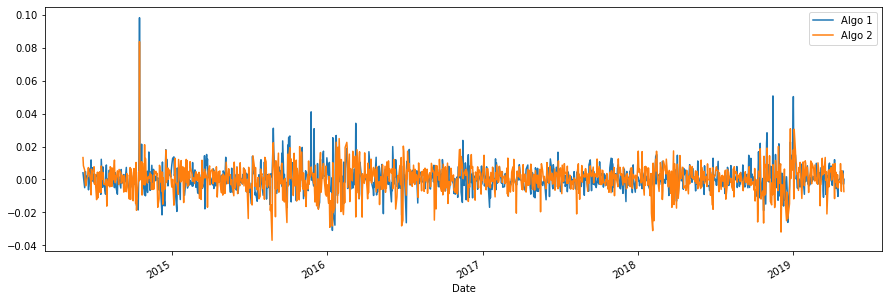

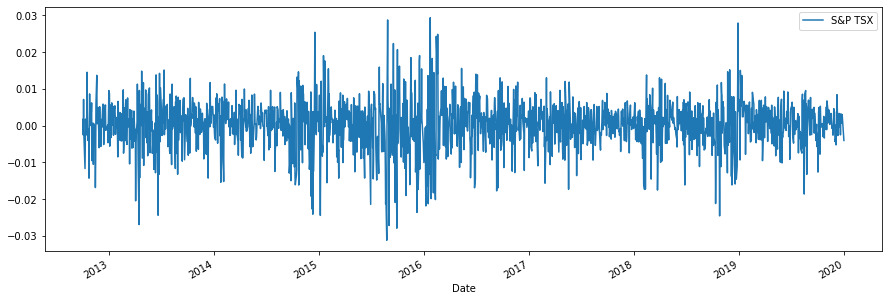

In [17]:
# Plot daily returns of all portfolios
whale_returns.plot(figsize=(15,5))
algo_returns.plot(figsize=(15,5))
sp_tsx_returns.plot(figsize=(15,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

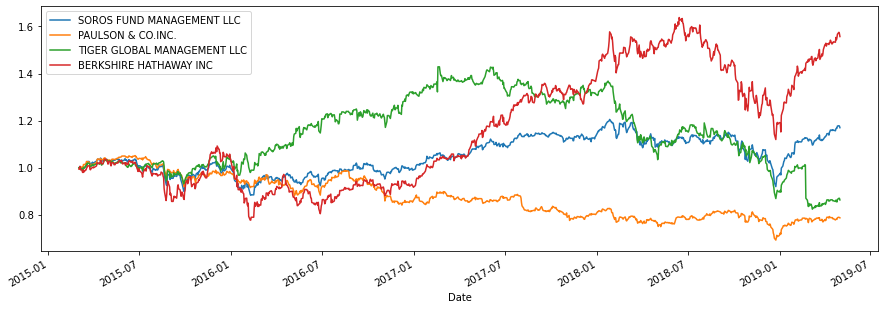

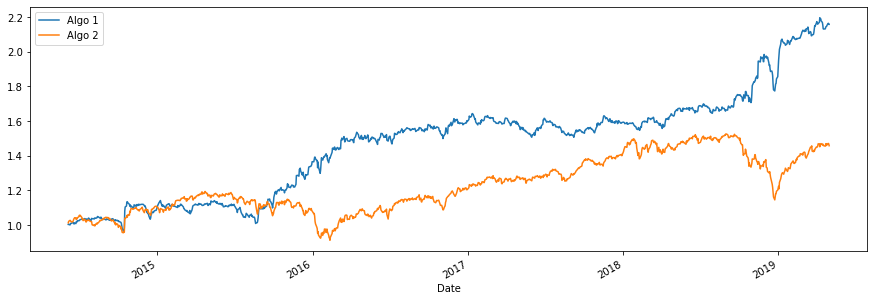

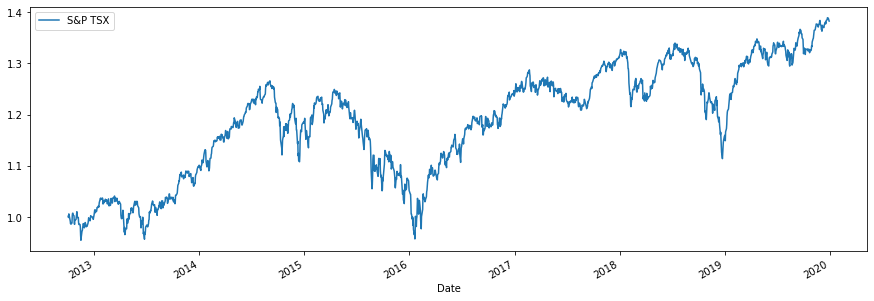

In [18]:
# Calculate cumulative returns of all portfolios
whale_cumulative_returns = (1 + whale_returns).cumprod()
algo_cumulative_returns = (1 + algo_returns).cumprod()
sp_tsx_cumulative_returns = (1 + sp_tsx_returns).cumprod()

whale_cumulative_returns.plot(figsize=(15,5))
algo_cumulative_returns.plot(figsize=(15,5))
sp_tsx_cumulative_returns.plot(figsize=(15,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

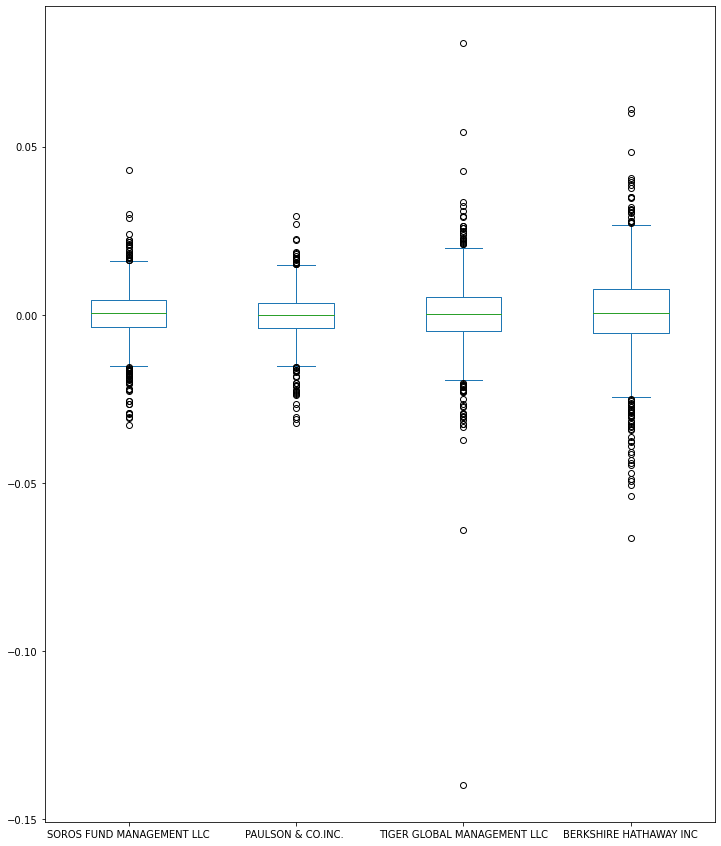

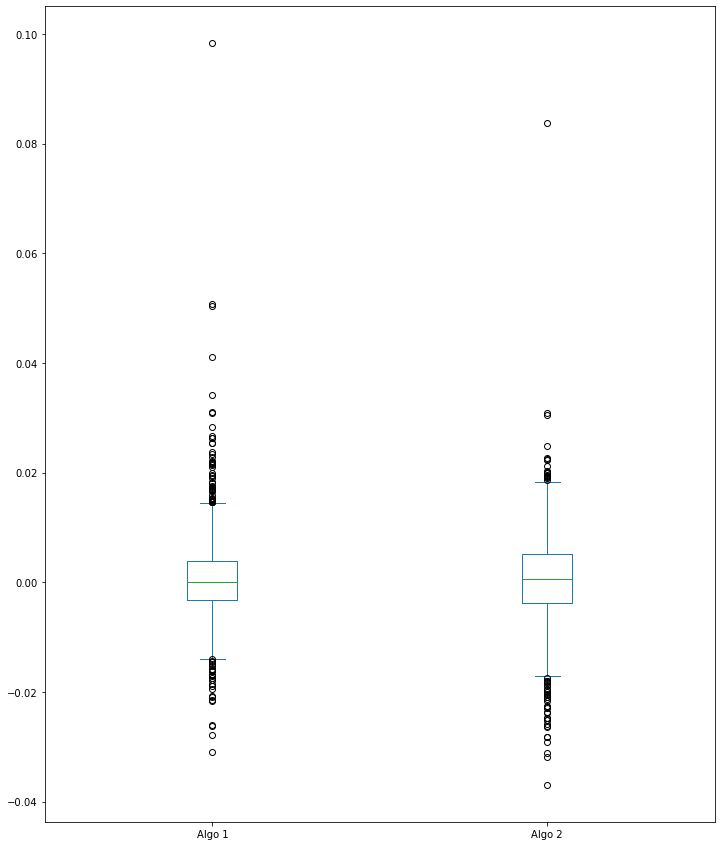

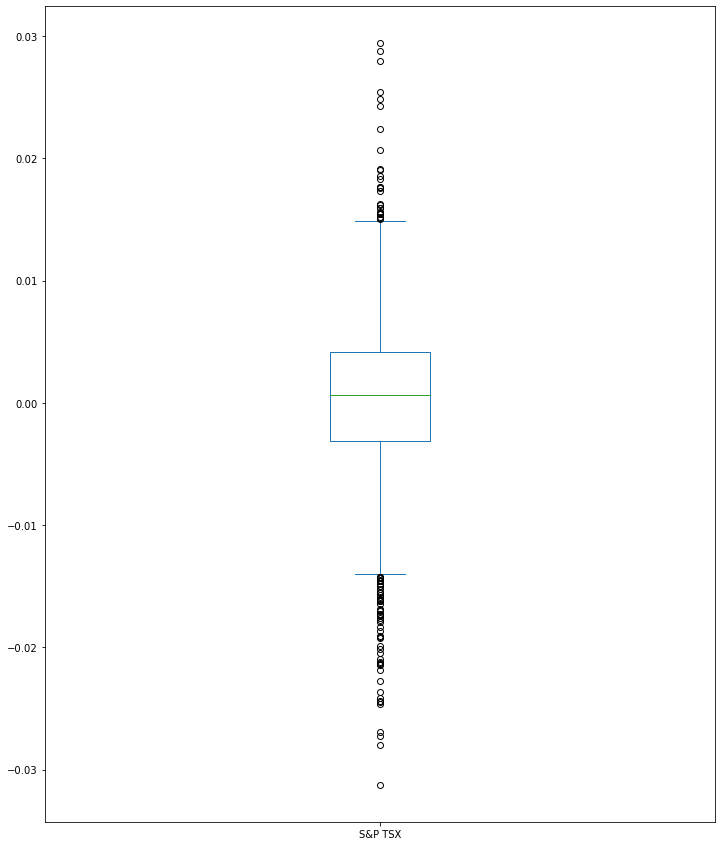

In [19]:
# Box plot to visually show risk
# Plot daily returns of all portfolios
whale_returns.plot.box(figsize=(12,15))
algo_returns.plot.box(figsize=(12,15))
sp_tsx_returns.plot.box(figsize=(12,15))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
whale_std = whale_returns.std()
algo_std = algo_returns.std()

### Determine which portfolios are riskier than the S&P TSX 60

Both the Whales and Algorithmic portfolios are riskier than the S&P TSX 60 index as they have higher standard deviations.

In [21]:
# Calculate the daily standard deviation of S&P TSX 60
sp_tsx_std = sp_tsx_returns.std()

print(
    f"Standard Distribution of Daily Returns\n"
    f"--------------------------------------\n"
    f"Whales: {round(whale_std[0], 8)}\n"
    f"Algorithmic: {round(algo_std[0], 8)}\n"
    f"S&P TSX 60: {round(sp_tsx_std[0], 8)}\n\n"
)


Standard Distribution of Daily Returns
--------------------------------------
Whales: 0.00784196
Algorithmic: 0.00798771
S&P TSX 60: 0.00663736




### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
whale_std_annual = whale_std * np.sqrt(252)
whale_std_annual

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [23]:
algo_std_annual = algo_std * np.sqrt(252)
algo_std_annual

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [24]:
sp_tsx_std_annual = sp_tsx_std * np.sqrt(252)
sp_tsx_std_annual

S&P TSX    0.105365
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

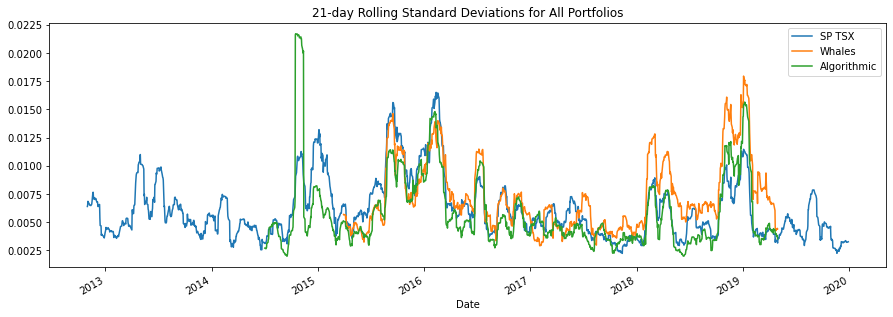

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_std_roll_21 = whale_returns.mean(axis=1).rolling(window=21).std()
algo_std_roll_21 = algo_returns.mean(axis=1).rolling(window=21).std()
sp_tsx_std_roll_21 = sp_tsx_returns.mean(axis=1).rolling(window=21).std()

# Plot the rolling standard deviation
ax = sp_tsx_std_roll_21.plot(figsize=(15,5), title='21-day Rolling Standard Deviations for All Portfolios')
whale_std_roll_21.plot(ax=ax)
algo_std_roll_21.plot(ax=ax)

ax.legend(['SP TSX', 'Whales', 'Algorithmic'])

### Calculate and plot the correlation

In [26]:
# Calculate the correlation
correlation = all_returns.corr()

# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

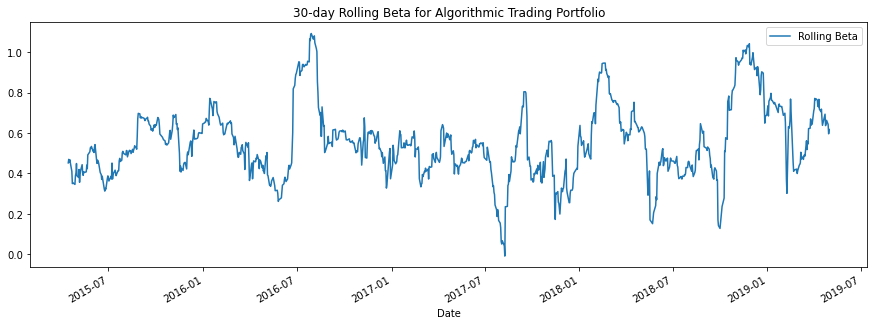

In [27]:
# Calculate covariance of a single portfolio
algo_portfolio = all_returns[['Algo 1', 'Algo 2']]

algo_covariance = algo_portfolio.mean(axis=1).cov(all_returns['S&P TSX'])
algo_rolling_covariance = algo_portfolio.mean(axis=1).rolling(window=30).cov(all_returns['S&P TSX'])

# Calculate variance of S&P TSX
sp_tsx_variance = all_returns['S&P TSX'].var()
sp_tsx_rolling_variance = all_returns['S&P TSX'].rolling(window=30).var()

# Computing beta
algo_beta = algo_covariance / sp_tsx_variance
algo_rolling_beta = algo_rolling_covariance / sp_tsx_rolling_variance

# Plot beta trend
ax = algo_rolling_beta.plot(figsize=(15,5), title="30-day Rolling Beta for Algorithmic Trading Portfolio")

ax.legend(['Rolling Beta'])


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

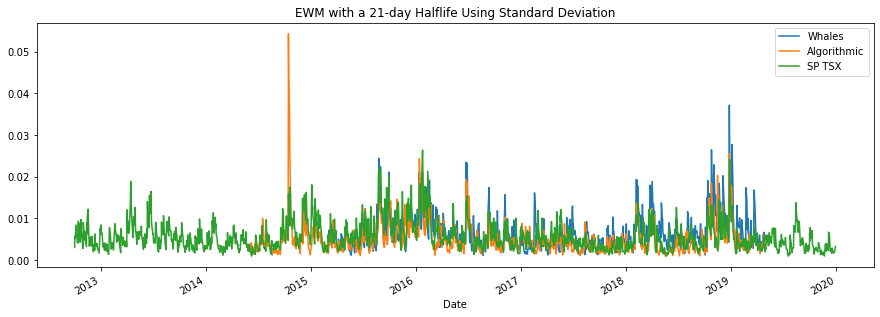

In [28]:
# Use `ewm` to calculate the rolling window
whale_std_ewm = whale_returns.mean(axis=1).ewm(halflife='21 days', times=whale_returns.index).std()
algo_std_ewm = algo_returns.mean(axis=1).ewm(halflife='21 days', times=algo_returns.index).std()
sp_tsx_std_ewm = sp_tsx_returns.mean(axis=1).ewm(halflife='21 days', times=sp_tsx_returns.index).std()

ax = whale_std_ewm.plot(figsize=(15,5), title="EWM with a 21-day Halflife Using Standard Deviation")
algo_std_ewm.plot(ax=ax)
sp_tsx_std_ewm.plot(ax=ax)

ax.legend(['Whales', 'Algorithmic', 'SP TSX'])

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

---

In [29]:
# Annualized Sharpe Ratios
whale_sharpe_ratio_annual = (whale_returns.mean() * 252) / (whale_std_annual)
algo_sharpe_ratio_annual = (algo_returns.mean() * 252) / (algo_std_annual)
sp_tsx_sharpe_ratio_annual = (sp_tsx_returns.mean() * 252) / (sp_tsx_std_annual)

all_ratios = pd.concat([whale_sharpe_ratio_annual, algo_sharpe_ratio_annual, sp_tsx_sharpe_ratio_annual], axis="rows", join="inner")
all_ratios


SOROS FUND MANAGEMENT LLC      0.361568
PAULSON & CO.INC.             -0.462131
TIGER GLOBAL MANAGEMENT LLC   -0.118257
BERKSHIRE HATHAWAY INC         0.619628
Algo 1                         1.300176
Algo 2                         0.639258
S&P TSX                        0.478866
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of all Portfolios'}>

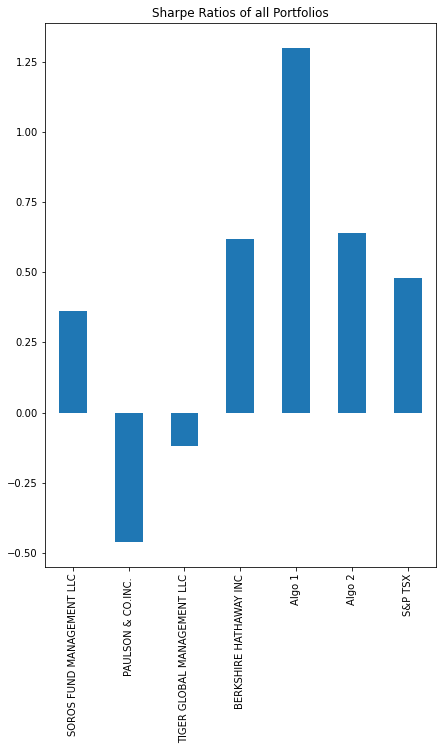

In [30]:
# Visualize the sharpe ratios as a bar plot
all_ratios.plot.bar(figsize=(7,10), title="Sharpe Ratios of all Portfolios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

The algorithmic trading strategies outperform both the Whales and the S&P TSX 60.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [82]:
# Reading data from each stock
nvda_df = pd.read_csv('./resources/nvda_historical.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
avgo_df = pd.read_csv('./resources/avgo_historical.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
intc_df = pd.read_csv('./resources/intc_historical.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
amd_df = pd.read_csv('./resources/amd_historical.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
qcom_df = pd.read_csv('./resources/qcom_historical.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)

In [83]:
# Combine all stocks in a single DataFrame
portfolio_df = pd.concat([nvda_df, avgo_df, intc_df, amd_df, qcom_df], join='inner', axis='columns')
portfolio_df.head()

,Close,Close,Close,Close,Close
Date,,,,,
2021-03-17 16:00:00,133.41,483.59,65.78,82.63,133.92
2021-03-18 16:00:00,127.23,464.15,63.73,78.12,129.75
2021-03-19 16:00:00,128.46,474.46,63.76,79.06,131.02
2021-03-22 16:00:00,131.86,475.28,65.63,80.30,134.09
2021-03-23 16:00:00,130.71,464.06,63.48,78.38,132.52


In [84]:
# Reset Date index
portfolio_df.reset_index(inplace=True)
portfolio_df['Date'] = pd.to_datetime(portfolio_df['Date']).dt.normalize()
portfolio_df.set_index('Date', inplace=True)
portfolio_df.head()

,Close,Close,Close,Close,Close
Date,,,,,
2021-03-17,133.41,483.59,65.78,82.63,133.92
2021-03-18,127.23,464.15,63.73,78.12,129.75
2021-03-19,128.46,474.46,63.76,79.06,131.02
2021-03-22,131.86,475.28,65.63,80.30,134.09
2021-03-23,130.71,464.06,63.48,78.38,132.52


In [85]:
# Reorganize portfolio data by having a column per symbol
portfolio_df.columns = ['NVDA', 'AVGO', 'INTC', 'AMD', 'QCOM']
portfolio_df.head()

,NVDA,AVGO,INTC,AMD,QCOM
Date,,,,,
2021-03-17,133.41,483.59,65.78,82.63,133.92
2021-03-18,127.23,464.15,63.73,78.12,129.75
2021-03-19,128.46,474.46,63.76,79.06,131.02
2021-03-22,131.86,475.28,65.63,80.30,134.09
2021-03-23,130.71,464.06,63.48,78.38,132.52


In [86]:
# Calculate daily returns
daily_returns = portfolio_df.pct_change()

# Drop NAs
daily_returns.dropna(inplace=True)

# Display sample data
daily_returns.head()

,NVDA,AVGO,INTC,AMD,QCOM
Date,,,,,
2021-03-18,-0.046323,-0.040199,-0.031164,-0.054581,-0.031138
2021-03-19,0.009668,0.022213,0.000471,0.012033,0.009788
2021-03-22,0.026467,0.001728,0.029329,0.015684,0.023432
2021-03-23,-0.008721,-0.023607,-0.032759,-0.023910,-0.011709
2021-03-24,-0.032744,-0.014632,-0.022684,-0.024241,-0.040296


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [87]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Calculate portfolio return
weighted_returns = daily_returns.dot(weights)

# Display sample data
weighted_returns.head()

Date
2021-03-18   -0.040681
2021-03-19    0.010834
2021-03-22    0.019328
2021-03-23   -0.020141
2021-03-24   -0.026919
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [88]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_df['Weighted Returns'] = weighted_returns
portfolio_df.head()

,NVDA,AVGO,INTC,AMD,QCOM,Weighted Returns
Date,,,,,,
2021-03-17,133.41,483.59,65.78,82.63,133.92,NaN
2021-03-18,127.23,464.15,63.73,78.12,129.75,-0.040681
2021-03-19,128.46,474.46,63.76,79.06,131.02,0.010834
2021-03-22,131.86,475.28,65.63,80.30,134.09,0.019328
2021-03-23,130.71,464.06,63.48,78.38,132.52,-0.020141


In [96]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_df.dropna(inplace=True)
portfolio_df.head()

,NVDA,AVGO,INTC,AMD,QCOM,Weighted Returns
Date,,,,,,
2021-03-18,127.23,464.15,63.73,78.12,129.75,-0.040681
2021-03-19,128.46,474.46,63.76,79.06,131.02,0.010834
2021-03-22,131.86,475.28,65.63,80.30,134.09,0.019328
2021-03-23,130.71,464.06,63.48,78.38,132.52,-0.020141
2021-03-24,126.43,457.27,62.04,76.48,127.18,-0.026919


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [90]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [91]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [92]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [93]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [94]:
# Calculate Annualized Sharpe Ratios


In [95]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!